# Experimental Analysis of Different Bumping Strategies in *RoundingSat*

This document provides a complete analysis of the performance of the pseudo-Boolean solver *RoundingSat* in which
different variants of the EVSIDS heuristic have been implemented.

By default, this document is **not** dynamic, so as to be readable on GitLab.
You may switch to a dynamic document by setting the variable `dynamic` to `True`, and re-run this Jupyter Notebook (the serialized results of the campaign are also available in this directory).
Note that the [*latest version of Metrics*](https://pypi.org/project/crillab-metrics/) must be installed in your environment to run this notebook.

In [1]:
dynamic = False
figsize = (10, 7)

## Loading the experiments

First, let us load the experiments with *Metrics*.
We note that an experiment will be considered as successfull when the solver has been able to decide whether the input formula is `SATISFIABLE` or `UNSATISFIABLE`.
Otherwise, the solver did not have enough time to decide the satisfiability of the formula, and either outputed `UNKNOWN` or nothing (if it did not have enough time to handle the `SIGTERM` signal).

In [2]:
from os import path
from metrics.wallet import Analysis, import_analysis

In [3]:
campaign_name = 'roundingsat-bump'

if path.exists(f'{campaign_name}.json'):
    # Loading the serialized campaign.
    with open(f'{campaign_name}.json') as json_analysis:
        roundingsat_bump = import_analysis(json_analysis.read())

else:
    # Extracting the campaign from the log files of the experiments, and serializing it for later use.
    roundingsat_bump = Analysis(f'{campaign_name}.yml',
                                is_success=lambda xp: xp['decision'] in ('SATISFIABLE', 'UNSATISFIABLE'))
    with open(f'{campaign_name}.json', 'w') as json_analysis:
        json_analysis.write(roundingsat_bump.export())

We now keep the list of all the considered solvers to easily retrieve them later on.

In [4]:
all_solvers = roundingsat_bump.campaign_df.xp_ware_names

In [5]:
solver_map = {
    'bump-assigned': 'bump-assigned (once)',
    'bump-assigned-each': 'bump-assigned (each)',
    'bump-coefficient': 'bump-coefficient (each)',
    'bump-cood': 'bump-ratio-coefficient-degree (each)',
    'bump-degree': 'bump-degree (each)',
    'bump-dooc': 'bump-ratio-degree-coefficient (each)',
    'bump-each': 'bump-any (each)',
    'bump-effective': 'bump-effective (once)',
    'bump-effective-each': 'bump-effective (each)',
    'bump-falsified': 'bump-falsified (once)',
    'bump-falsified-each': 'bump-falsified (each)',
    'default': 'bump-any (once)',
    'VBS': 'VBS'
}

## Virtual Best Solver

Let us create the VBS to show it on cactus plots.

In [6]:
roundingsat_bump = roundingsat_bump.add_vbew(xp_ware_set=all_solvers,
                                             opti_col='cpu_time',
                                             vbew_name='VBS')

## Overview of the Results

First, let us get an overview of the experimental results of the different strategies with a cactus plots of their runtime.

<AxesSubplot:title={'center':'Cactus Plot of the Runtime'}, xlabel='Number of solved inputs', ylabel='Runtime (in seconds)'>

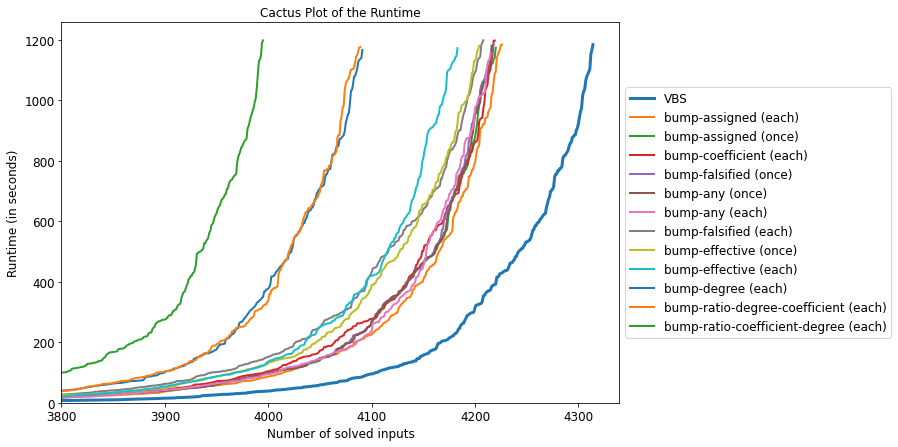

In [7]:
roundingsat_bump.get_cactus_plot(cactus_col='cpu_time',
                                 x_min=3800,
                                 
                                 title='Cactus Plot of the Runtime',
                                 y_axis_name="Runtime (in seconds)",
                                 xp_ware_name_map=solver_map,
                                 show_marker=False,
                                 
                                 bbox_to_anchor=(1, 0.5),
                                 legend_location='center left',
                             
                                 figsize=figsize,
                                 
                                 dynamic=dynamic)

Let us now consider the cactus plot of the number of conflicts encountered by the solver, so as to get insights about the size of the proofs built by the different configurations considered here.

<AxesSubplot:title={'center':'Cactus Plot of the Number of Conflicts'}, xlabel='Number of solved inputs', ylabel='Number of Conflicts'>

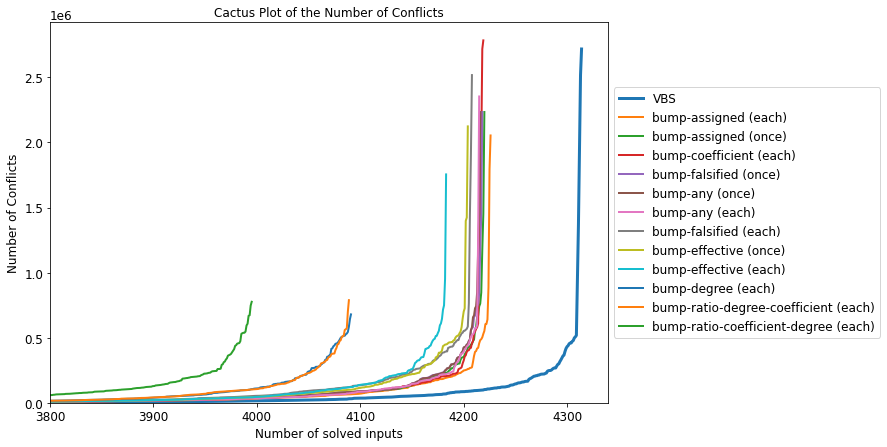

In [8]:
roundingsat_bump.get_cactus_plot(cactus_col='conflicts',
                                 x_min=3800,
                                 
                                 title='Cactus Plot of the Number of Conflicts',
                                 y_axis_name="Number of Conflicts",
                                 xp_ware_name_map=solver_map,
                                 show_marker=False,
                                 
                                 bbox_to_anchor=(1, 0.5),
                                 legend_location='center left',
                             
                                 figsize=figsize,
                                 
                                 dynamic=dynamic)

A more precise view of the size of the proof may be obtained by looking at the number of cancellations performed
by the solver, instead of the number of conflicts.

<AxesSubplot:title={'center':'Cactus Plot of the Number of Cancellations'}, xlabel='Number of solved inputs', ylabel='Number of Cancellations'>

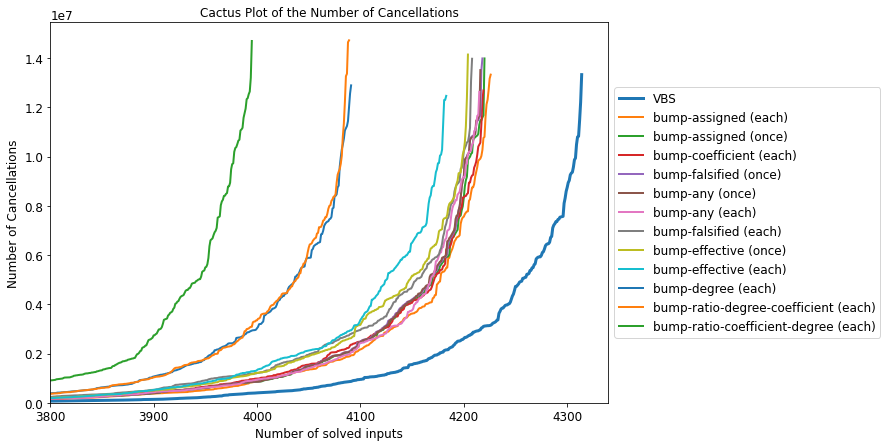

In [9]:
roundingsat_bump.get_cactus_plot(cactus_col='steps',
                                 x_min=3800,
                                 
                                 title='Cactus Plot of the Number of Cancellations',
                                 y_axis_name="Number of Cancellations",
                                 xp_ware_name_map=solver_map,
                                 show_marker=False,
                                 
                                 bbox_to_anchor=(1, 0.5),
                                 legend_location='center left',
                             
                                 figsize=figsize,
                                 
                                 dynamic=dynamic)

## Pairwise Comparison of the Strategies

Let us now draw different scatter plots to get deeper insights on the behavior of the different strategies.

### Impact of the number of times a literal is bumped

There are two main different ways of bumping literals.
The first one is to either bump the literals appearing during conflict analysis only once, or to bump them each
time they appear.
In this section, we study the difference between these two approaches with different bumping strategies.

In [10]:
roundingsat_bump.get_scatter_plot(xp_ware_x='default',
                                  xp_ware_y='bump-each',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (once) and bump-any (each)'}, xlabel='bump-any (once)', ylabel='bump-any (each)'>

In [11]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-assigned',
                                  xp_ware_y='bump-assigned-each',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-assigned (once) and bump-assigned (each)'}, xlabel='bump-assigned (once)', ylabel='bump-assigned (each)'>

<AxesSubplot:title={'center':'Comparison of bump-falsified (once) and bump-falsified (each)'}, xlabel='bump-falsified (once)', ylabel='bump-falsified (each)'>

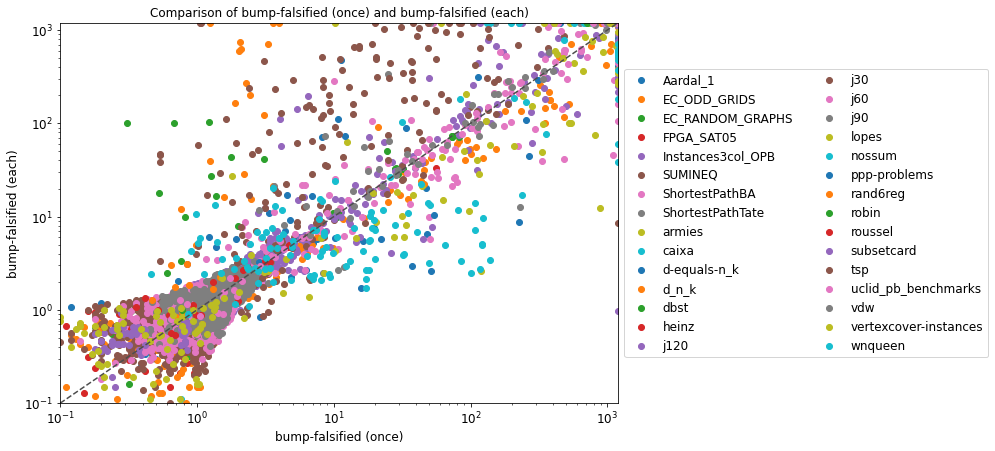

In [12]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-falsified',
                                  xp_ware_y='bump-falsified-each',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-effective (once) and bump-effective (each)'}, xlabel='bump-effective (once)', ylabel='bump-effective (each)'>

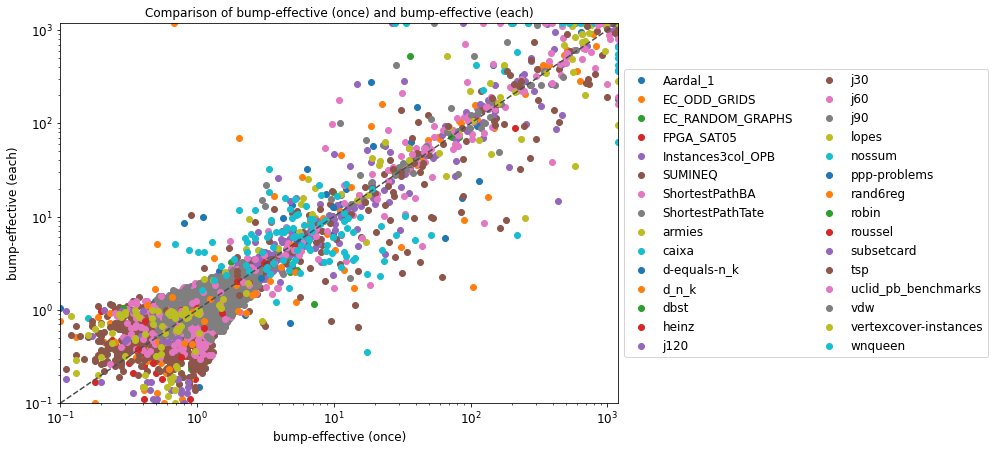

In [13]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-effective',
                                  xp_ware_y='bump-effective-each',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

### Impact of the actual bumping strategies

Let us now study the impact of the different bumping strategies.
First, it is worth noting that, if we only bump literals once, there is almost no difference between the default approach and the bumping of assigned or falsified literals, as illustrated by the following scatter plots.
This suggests that, because of the aggressive weakening implemented in *RoundingSat*, literals that remain in the constraints encountered during conflict analysis are most of the time falsified, so that these strategies actually perform similar bumping.

<AxesSubplot:title={'center':'Comparison of bump-any (once) and bump-assigned (once)'}, xlabel='bump-any (once)', ylabel='bump-assigned (once)'>

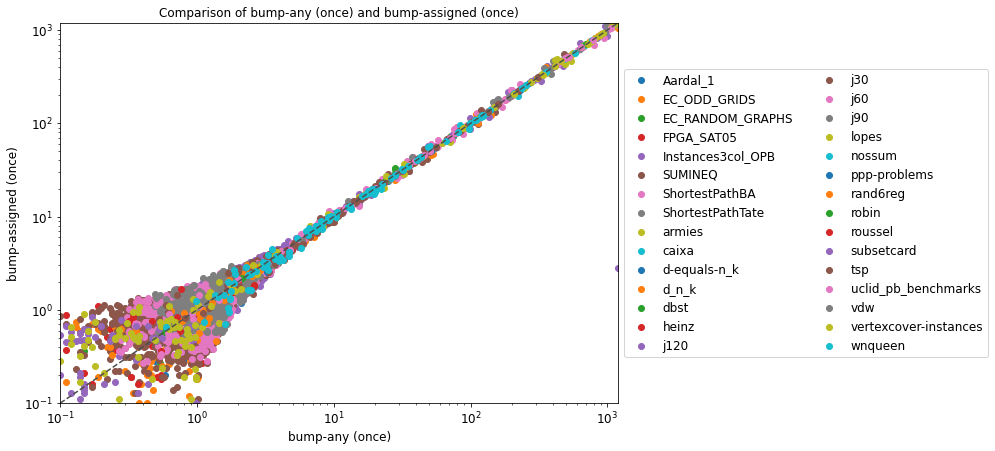

In [14]:
roundingsat_bump.get_scatter_plot(xp_ware_x='default',
                                  xp_ware_y='bump-assigned',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

In [15]:
roundingsat_bump.get_scatter_plot(xp_ware_x='default',
                                  xp_ware_y='bump-falsified',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (once) and bump-falsified (once)'}, xlabel='bump-any (once)', ylabel='bump-falsified (once)'>

However, if we consider the bumping of effective literals only, then the behavior is clearly different between the two variants, even though there is no clear advantage for one strategy or the other.
This however tends to suggests that ineffective literals remain in the constraints derived by *RoundingSat*.

In [16]:
roundingsat_bump.get_scatter_plot(xp_ware_x='default',
                                  xp_ware_y='bump-effective',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (once) and bump-effective (once)'}, xlabel='bump-any (once)', ylabel='bump-effective (once)'>

Let us now study the impact of the coefficient-based bumping strategies.
It is important to note that, for these strategies, the bumping has to be performed each time the literal is encountered, since otherwise we would also need a way to aggregate the scores.
To avoid biases, we thus compare these strategies with the `bump-each` strategy rather than the `default` one.

In [17]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-each',
                                  xp_ware_y='bump-cood',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (each) and bump-ratio-coefficient-degree (each)'}, xlabel='bump-any (each)', ylabel='bump-ratio-coefficient-degree (each)'>

<AxesSubplot:title={'center':'Comparison of bump-any (each) and bump-ratio-degree-coefficient (each)'}, xlabel='bump-any (each)', ylabel='bump-ratio-degree-coefficient (each)'>

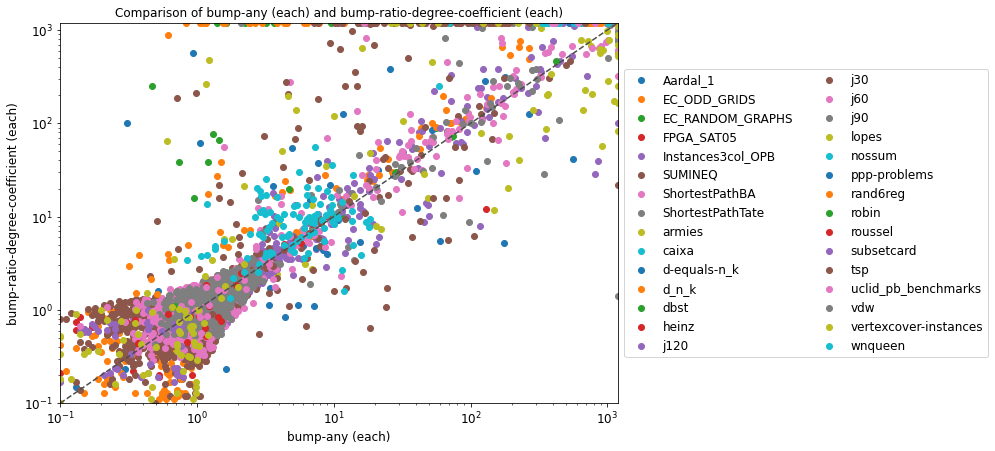

In [18]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-each',
                                  xp_ware_y='bump-dooc',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (each) and bump-degree (each)'}, xlabel='bump-any (each)', ylabel='bump-degree (each)'>

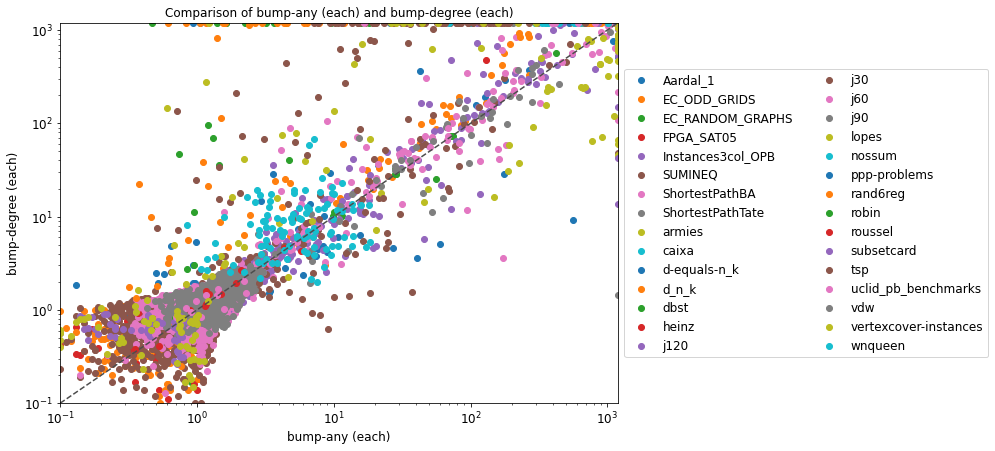

In [19]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-each',
                                  xp_ware_y='bump-degree',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

In [20]:
roundingsat_bump.get_scatter_plot(xp_ware_x='bump-each',
                                  xp_ware_y='bump-coefficient',
                                  
                                  color_col='family',
                                  xp_ware_name_map=solver_map,
                                  
                                  x_min=0.1, x_max=1200, logx=True,
                                  y_min=0.1, y_max=1200, logy=True,
                                 
                                  bbox_to_anchor=(1, 0.5),
                                  legend_location='center left',
                                  ncol_legend=2,
                             
                                  figsize=figsize,
                                 
                                  dynamic=dynamic)

<AxesSubplot:title={'center':'Comparison of bump-any (each) and bump-coefficient (each)'}, xlabel='bump-any (each)', ylabel='bump-coefficient (each)'>